In [1]:
library(Seurat)
library(Signac)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [ ]:
# writes out coverage plots for all of the cellcards gene markers
# skips if the gene is not found

In [4]:
sobj_atac_cln <- readRDS("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/06_paired_tag_integ_atac/240105_02_indiv_atac.RDS")

In [5]:
sobj_atac_cln

An object of class Seurat 
126070 features across 5392 samples within 3 assays 
Active assay: ATAC (75257 features, 0 variable features)
 2 other assays present: RNA, SCT
 2 dimensional reductions calculated: pca, umap

In [6]:
colnames(sobj_atac_cln@meta.data)

[1] "orig.ident"                       "nCount_RNA"                      
 [3] "nFeature_RNA"                     "nCount_ATAC"                     
 [5] "nFeature_ATAC"                    "fragments_freq_count"            
 [7] "FRiP"                             "percent.mt"                      
 [9] "nCount_SCT"                       "nFeature_SCT"                    
[11] "pANN_0.25_0.04_707"               "DF.classifications_0.25_0.04_707"
[13] "cell_barcode"                     "celltype_v04"

In [12]:
excel_file <- "/projects/ps-epigen/users/cmiciano/Lung/lungbpd_rna/scripts/CellRef_Supp_Tables_LungMAP.xlsx"

In [13]:
library(openxlsx)

In [16]:
cc <- read.xlsx(xlsxFile = excel_file , sheet = 1)
cc <- cc[c(-1, -181),]
cc <- cc[]
colnames(cc) <- c("CellType", "Marker", "MarkerType")
print(cc)

                  CellType   Marker MarkerType          NA
2                      AF1    TCF21          p        <NA>
3                      AF1     WNT2          p     Stromal
4                      AF1   PCDH15          p        <NA>
5                      AF2     CDON          p        <NA>
6                      AF2    MFAP5          p        <NA>
7                      AF2   SCARA5          p        <NA>
8              Chondrocyte   COL2A1          p        <NA>
9              Chondrocyte   HAPLN1          p        <NA>
10             Chondrocyte     SOX9          p        <NA>
11             Chondrocyte     ACAN          p        <NA>
12                    SCMF    DACH2          p        <NA>
13                    SCMF    FGF18          p        <NA>
14                    SCMF   ITGBL1          p        <NA>
15                    SCMF   PDGFRA          p        <NA>
16                    ASMC      DES          p        <NA>
17                    ASMC     LGR6          p        <N

In [17]:
celltypes <- unique(cc$CellType)

In [18]:
cc.gene.set <- lapply(X = celltypes, FUN = function(X){
    cc.markers <- cc[grep(pattern = paste0("^", X ,"$"), x = cc$CellType),]$Marker
    
    return(cc.markers)
})

In [19]:
cc.gene.set <- setNames(cc.gene.set, celltypes)

In [21]:
cc.gene.set[[1]]

[1] "TCF21"  "WNT2"   "PCDH15"

In [26]:
library(gprofiler2)

Warning message:
“package ‘gprofiler2’ was built under R version 4.1.3”


In [27]:
gene_set_mm10 <-  gorth(cc.gene.set[[1]], source_organism = "hsapiens", 
                 target_organism = "mmusculus")$ortholog_name

In [28]:
gene_set_mm10

[1] "Tcf21"  "Wnt2"   "Pcdh15"

In [36]:
assay <- DefaultAssay(sobj_atac_cln)

In [38]:
dir.create("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/outputs/paired_tag/coverage_plots/")

In [39]:
dir.create("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/outputs/paired_tag/coverage_plots/240106/")

In [40]:
dir.create("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/outputs/paired_tag/coverage_plots/240106/ATAC/")

In [41]:
outdir <- "/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/outputs/paired_tag/coverage_plots/240106/ATAC/"

In [37]:
paste0(assay, "_", names(cc.gene.set)[[1]], "_", gene_set_mm10[1], ".pdf")

[1] "ATAC_AF1_Tcf21.pdf"

In [45]:
gene_set_mm10

[1] "Tcf21"  "Wnt2"   "Pcdh15"

In [48]:
length(cc.gene.set)

[1] 48

In [47]:
gene_set_mm10 <-  gorth(cc.gene.set[[1]], source_organism = "hsapiens", 
                 target_organism = "mmusculus")$ortholog_name
for (gene in gene_set_mm10) {
    print(gene)
    pdf(paste0(outdir, assay, "_", names(cc.gene.set)[[1]], "_", gene, ".pdf"))
    print(CoveragePlot(sobj_atac_cln, region = gene, annotation = T, window = 2000, peaks = F, 
             extend.upstream = 15000, extend.downstream = 5000, group.by = "celltype_v04") )
    dev.off()
}

[1] "Tcf21"
[1] "Wnt2"
[1] "Pcdh15"


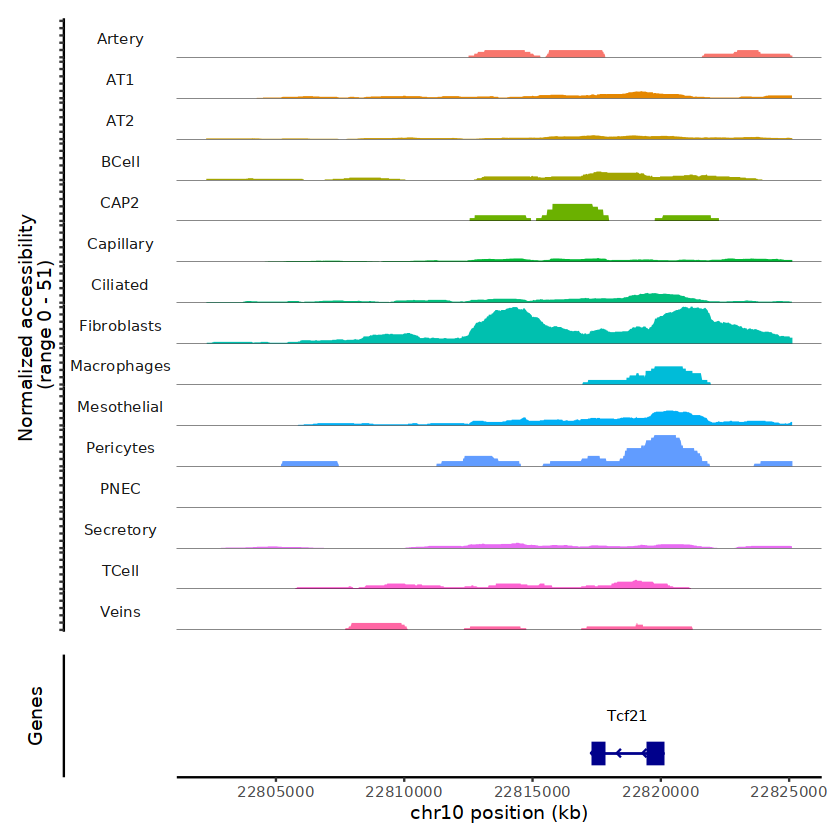

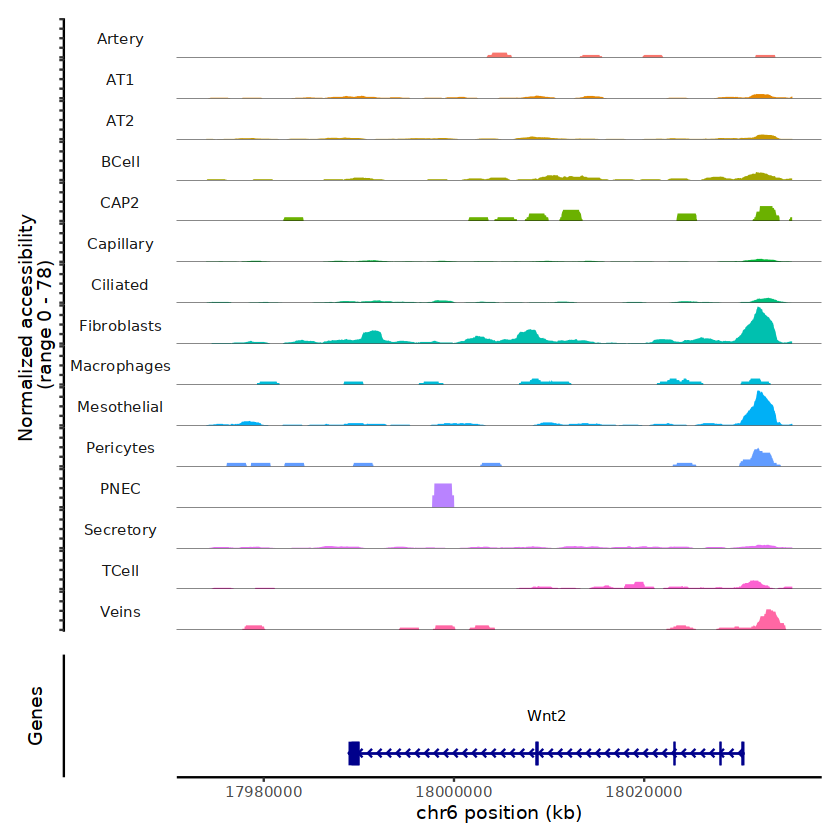

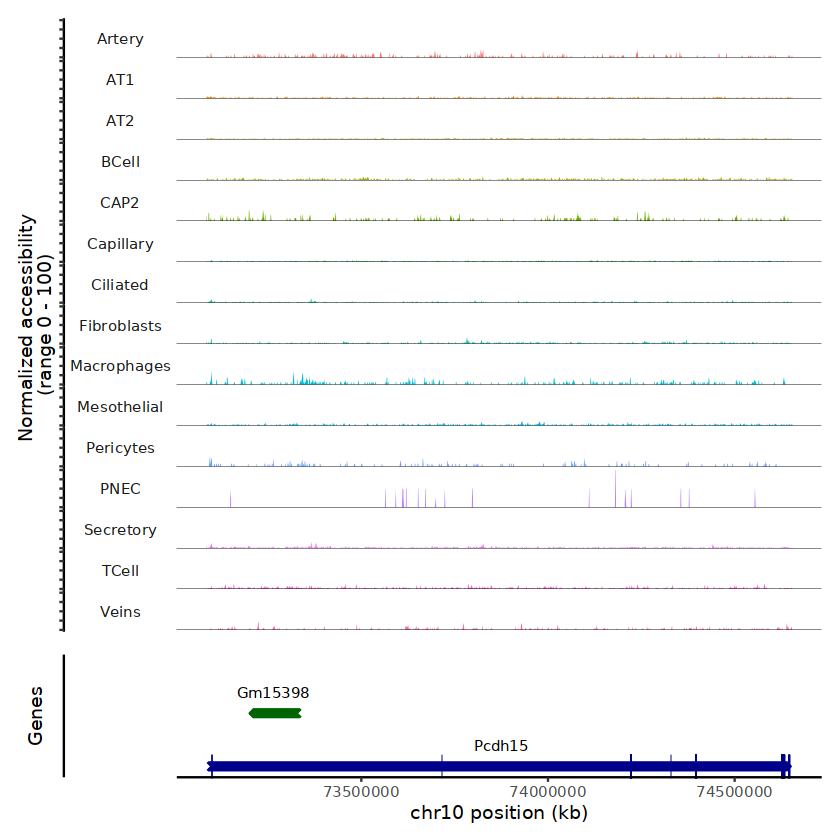

In [30]:
for (gene in gene_set_mm10) {
    print(CoveragePlot(sobj_atac_cln, region = gene, annotation = T, window = 2000, peaks = F, 
             extend.upstream = 15000, extend.downstream = 5000, group.by = "celltype_v04") )
}

In [50]:
# iterate through gene set for each celltype and write out coverage plots

for (i in 1:length(cc.gene.set)) {
    gene_set_mm10 <-  gorth(cc.gene.set[[i]], source_organism = "hsapiens", 
                     target_organism = "mmusculus")$ortholog_name
    print(paste0("Making coverage plots for ", names(cc.gene.set)[[i]]))
    for (gene in gene_set_mm10) {
        print(gene)
        pdf(paste0(outdir, assay, "_", names(cc.gene.set)[[i]], "_", gene, ".pdf"))
        print(CoveragePlot(sobj_atac_cln, region = gene, annotation = T, window = 2000, peaks = F, 
                 extend.upstream = 15000, extend.downstream = 5000, group.by = "celltype_v04") )
        dev.off()
    }
}

[1] "Making coverage plots for AF1"
[1] "Tcf21"
[1] "Wnt2"
[1] "Pcdh15"
[1] "Making coverage plots for AF2"
[1] "Cdon"


Warning message:
“Removed 3 rows containing missing values (position_stack).”


[1] "Mfap5"


Warning message:
“Removed 36 rows containing missing values (position_stack).”


[1] "Scara5"
[1] "Making coverage plots for Chondrocyte"
[1] "Col2a1"


Warning message:
“Removed 6 rows containing missing values (position_stack).”


[1] "Hapln1"
[1] "Sox9"


Warning message:
“Removed 67 rows containing missing values (geom_segment).”
Warning message:
“Removed 1 rows containing missing values (geom_segment).”


[1] "Acan"


Warning message:
“Removed 5 rows containing missing values (geom_segment).”


[1] "Making coverage plots for SCMF"
[1] "Dach2"
[1] "Fgf18"


Warning message:
“Removed 46 rows containing missing values (geom_segment).”
Warning message:
“Removed 1 rows containing missing values (geom_segment).”


[1] "Itgbl1"


Warning message:
“Removed 8 rows containing missing values (geom_segment).”


[1] "Pdgfra"
[1] "Making coverage plots for ASMC"
[1] "Des"
[1] "Lgr6"


Warning message:
“Removed 56 rows containing missing values (geom_segment).”


[1] "Making coverage plots for VSMC"
[1] "Cnn1"


Warning message:
“Removed 9 rows containing missing values (position_stack).”
Warning message:
“Removed 30 rows containing missing values (geom_segment).”


[1] "Ntrk3"
[1] "Itga7"


Warning message:
“Removed 43 rows containing missing values (position_stack).”
Warning message:
“Removed 18 rows containing missing values (geom_segment).”


[1] "Making coverage plots for Pericyte"
[1] "Pdgfrb"


Warning message:
“Removed 2 rows containing missing values (geom_segment).”


[1] "Trpc6"


Warning message:
“Removed 30 rows containing missing values (position_stack).”


[1] "Cspg4"


Warning message:
“Removed 2 rows containing missing values (geom_segment).”


[1] "Lamc3"


Warning message:
“Removed 33 rows containing missing values (geom_segment).”


[1] "Making coverage plots for Mesothelial"
[1] "Upk3b"


Warning message:
“Removed 33 rows containing missing values (geom_segment).”


[1] "Wt1"
[1] "Calb2"


Warning message:
“Removed 7 rows containing missing values (position_stack).”


[1] "Making coverage plots for CAP1"
[1] "Il7r"


Warning message:
“Removed 12 rows containing missing values (position_stack).”


[1] "Gpihbp1"


Warning message:
“Removed 5 rows containing missing values (position_stack).”


[1] "Making coverage plots for CAP2"
[1] "Apln"
[1] "Ednrb"
[1] "Hpgd"
[1] "Car4"


Warning message:
“Removed 27 rows containing missing values (position_stack).”


[1] "Making coverage plots for AEC"
[1] "Dkk2"
[1] "Gja5"


Warning message:
“Removed 20 rows containing missing values (position_stack).”


[1] "Bmx"


Warning message:
“Removed 38 rows containing missing values (geom_segment).”


[1] "Making coverage plots for VEC"
[1] "Ackr1"


Warning message:
“Removed 28 rows containing missing values (geom_segment).”


[1] "Ephb4"


Warning message:
“Removed 22 rows containing missing values (position_stack).”
Warning message:
“Removed 174 rows containing missing values (geom_segment).”


[1] "Hdac9"


Warning message:
“Removed 1 rows containing missing values (position_stack).”


[1] "Making coverage plots for LEC"
[1] "Prox1"
[1] "Mmrn1"
[1] "Gm13304"
[1] "Ccl21d"


ERROR: Error in FindRegion(object = object, region = region, sep = sep, assay = assay, : Gene not found


In [52]:
i

[1] 13

In [54]:
generateCovPlot <- function(input) {
    gene_set_mm10 <-  gorth(cc.gene.set[[input]], source_organism = "hsapiens", 
                     target_organism = "mmusculus")$ortholog_name
    print(paste0("Making coverage plots for ", names(cc.gene.set)[[input]]))
    for (gene in gene_set_mm10) {
        print(gene)
        pdf(paste0(outdir, assay, "_", names(cc.gene.set)[[input]], "_", gene, ".pdf"))
        print(CoveragePlot(sobj_atac_cln, region = gene, annotation = T, window = 2000, peaks = F, 
                 extend.upstream = 15000, extend.downstream = 5000, group.by = "celltype_v04") )
        dev.off()
    }
}

In [57]:
for (i in 14:length(cc.gene.set)) {
  
  skip_to_next <- FALSE

  # Note that print(b) fails since b doesn't exist
  print(i)
  tryCatch( 
            generateCovPlot(i)
           , error = function(e) { 
               skip_to_next <<- TRUE})

  if(skip_to_next) { next }  
    
    
}

[1] 14
[1] "Making coverage plots for SVEC"
[1] "Ackr1"


Warning message:
“Removed 28 rows containing missing values (geom_segment).”


[1] "Col15a1"


Warning message:
“Removed 3 rows containing missing values (position_stack).”


[1] "Abcb1b"


Warning message:
“Removed 1 rows containing missing values (geom_segment).”


[1] "Abcb1a"
[1] "Vwa1"


Warning message:
“Removed 25 rows containing missing values (geom_segment).”


[1] 15
[1] "Making coverage plots for PNEC"
[1] "Ascl1"
[1] "Calca"
[1] "Grp"
[1] "Ucma"


Warning message:
“Removed 9 rows containing missing values (position_stack).”
Warning message:
“Removed 81 rows containing missing values (geom_segment).”


[1] "Nrxn1"
[1] 16
[1] "Making coverage plots for Tuft"
[1] "Ascl2"


Warning message:
“Removed 6 rows containing missing values (position_stack).”


[1] "Pou2f3"


Warning message:
“Removed 1 rows containing missing values (geom_segment).”


[1] "Il23a"


Warning message:
“Removed 1 rows containing missing values (position_stack).”
Warning message:
“Removed 18 rows containing missing values (geom_segment).”


[1] 17
[1] "Making coverage plots for Ionocyte"
[1] "Foxi1"
[1] "Ascl3"


Warning message:
“Removed 3 rows containing missing values (position_stack).”
Warning message:
“Removed 15 rows containing missing values (geom_segment).”
Warning message:
“Removed 1 rows containing missing values (geom_segment).”


[1] "Cftr"
[1] 18
[1] "Making coverage plots for Basal"
[1] "Trp63"
[1] "Krt5"


Warning message:
“Removed 139 rows containing missing values (position_stack).”
Warning message:
“Removed 4 rows containing missing values (geom_segment).”


[1] "Gm5478"


Warning message:
“Removed 9 rows containing missing values (geom_segment).”


[1] "Ngfr"
[1] 19
[1] "Making coverage plots for Secretory"
[1] "Scgb1a1"


Warning message:
“Removed 33 rows containing missing values (position_stack).”
Warning message:
“Removed 10 rows containing missing values (geom_segment).”


[1] "Scube2"
[1] "Bpifb1"


Warning message:
“Removed 6 rows containing missing values (position_stack).”
Warning message:
“Removed 13 rows containing missing values (geom_segment).”


[1] "Lcn2"


Warning message:
“Removed 53 rows containing missing values (geom_segment).”


[1] "Tspan8"
[1] 20
[1] "Making coverage plots for RAS"
[1] "Scgb3a2"
[1] "Klk11"


Warning message:
“Removed 12 rows containing missing values (geom_segment).”


[1] "Mgp"


Warning message:
“Removed 1 rows containing missing values (position_stack).”
Warning message:
“Removed 3 rows containing missing values (geom_segment).”


[1] "Sox4"


Warning message:
“Removed 8 rows containing missing values (position_stack).”


[1] 21
[1] "Making coverage plots for Goblet"
[1] "Muc5ac"
[1] "Spdef"


Warning message:
“Removed 106 rows containing missing values (position_stack).”
Warning message:
“Removed 6 rows containing missing values (geom_segment).”


[1] "Pcdh7"
[1] "Slc4a11"


Warning message:
“Removed 5 rows containing missing values (geom_segment).”


[1] "Agr2"
[1] 22
[1] "Making coverage plots for Mucous"
[1] "Muc5b"


Warning message:
“Removed 12 rows containing missing values (position_stack).”
Warning message:
“Removed 21 rows containing missing values (geom_segment).”


[1] "Spdef"


Warning message:
“Removed 108 rows containing missing values (position_stack).”
Warning message:
“Removed 6 rows containing missing values (geom_segment).”


[1] "Bpifb2"


Warning message:
“Removed 3 rows containing missing values (geom_segment).”


[1] "Muc5ac"
[1] 23
[1] "Making coverage plots for Serous"
[1] "9530003J23Rik"


Warning message:
“Removed 2 rows containing missing values (geom_segment).”


[1] "Ltf"


Warning message:
“Removed 2 rows containing missing values (position_stack).”


[1] "Lpo"
[1] 24
[1] "Making coverage plots for MEC"
[1] "Krt14"


Warning message:
“Removed 1 rows containing missing values (geom_segment).”


[1] "Epcam"
[1] "Myh11"


Warning message:
“Removed 21 rows containing missing values (geom_segment).”


[1] 25
[1] "Making coverage plots for Ciliated"
[1] "Foxj1"


Warning message:
“Removed 74 rows containing missing values (geom_segment).”


[1] "Rsph1"


Warning message:
“Removed 37 rows containing missing values (geom_segment).”


[1] "Cdhr3"
[1] "Cdhr4"


Warning message:
“Removed 107 rows containing missing values (geom_segment).”


[1] 26
[1] "Making coverage plots for Deuterosomal"
[1] "Deup1"
[1] 27
[1] "Making coverage plots for SMG Basal/Duct"
[1] "Krt14"
[1] 28
[1] "Making coverage plots for Suprabasal"
[1] "Krt19"
[1] "Serpinb3a"


Warning message:
“Removed 5 rows containing missing values (position_stack).”


[1] "Serpinb3d"
[1] "Serpinb3c"


Warning message:
“Removed 15 rows containing missing values (geom_segment).”


[1] "Serpinb3b"
[1] "Notch3"
[1] 29
[1] "Making coverage plots for AT1"
[1] "Ager"


Warning message:
“Removed 36 rows containing missing values (position_stack).”
Warning message:
“Removed 94 rows containing missing values (geom_segment).”


[1] "Rtkn2"
[1] "Sema3b"


Warning message:
“Removed 59 rows containing missing values (geom_segment).”
Warning message:
“Removed 1 rows containing missing values (geom_segment).”


[1] 30
[1] "Making coverage plots for AT2"
[1] "Abca3"


Warning message:
“Removed 76 rows containing missing values (geom_segment).”
Warning message:
“Removed 1 rows containing missing values (geom_segment).”


[1] "Kcnj15"
[1] 31
[1] "Making coverage plots for AM"
[1] "Siglec1"


Warning message:
“Removed 34 rows containing missing values (position_stack).”
Warning message:
“Removed 60 rows containing missing values (geom_segment).”


[1] "Abcg1"
[1] "Fabp4"


Warning message:
“Removed 3 rows containing missing values (geom_segment).”


[1] "Pparg"
[1] "Marco"
[1] "Cd5l"
[1] "Cyp27a1"


Warning message:
“Removed 133 rows containing missing values (geom_segment).”


[1] 32
[1] "Making coverage plots for IM"
[1] "Slc40a1"


Warning message:
“Removed 16 rows containing missing values (position_stack).”


[1] "Folr2"


Warning message:
“Removed 32 rows containing missing values (position_stack).”
Warning message:
“Removed 9 rows containing missing values (geom_segment).”


[1] "F13a1"


Warning message:
“Removed 2 rows containing missing values (position_stack).”


[1] "Stab1"


Warning message:
“Removed 1 rows containing missing values (position_stack).”
Warning message:
“Removed 137 rows containing missing values (geom_segment).”


[1] 33
[1] "Making coverage plots for iMON"
[1] "Cd14"


Warning message:
“Removed 120 rows containing missing values (position_stack).”


[1] "Fcnb"
[1] "Vcan"


Warning message:
“Removed 2 rows containing missing values (geom_segment).”


[1] "Fcgr4"
[1] 34
[1] "Making coverage plots for pMON"
[1] "Fcnb"
[1] "Tnfrsf8"
[1] "Fcgr4"
[1] 35
[1] "Making coverage plots for cDC1"
[1] "Clec9a"


Warning message:
“Removed 29 rows containing missing values (position_stack).”
Warning message:
“Removed 5 rows containing missing values (geom_segment).”


[1] "Flt3"


Warning message:
“Removed 22 rows containing missing values (position_stack).”
Warning message:
“Removed 1 rows containing missing values (geom_segment).”


[1] "Zbtb46"


Warning message:
“Removed 4 rows containing missing values (position_stack).”
Warning message:
“Removed 5 rows containing missing values (geom_segment).”


[1] 36
[1] "Making coverage plots for cDC2"
[1] "Clec10a"


Warning message:
“Removed 30 rows containing missing values (position_stack).”


[1] "Mgl2"
[1] "Fcgr2b"
[1] "Fcgr3"
[1] 37
[1] "Making coverage plots for pDC"
[1] "Clec4b1"
[1] "Clec4a2"
[1] "Clec4a3"


Warning message:
“Removed 92 rows containing missing values (position_stack).”


[1] "Clec4a4"


Warning message:
“Removed 63 rows containing missing values (position_stack).”


[1] "Clec4b2"
[1] "Pld4"


Warning message:
“Removed 1 rows containing missing values (position_stack).”
Warning message:
“Removed 66 rows containing missing values (geom_segment).”


[1] 38
[1] "Making coverage plots for maDC"
[1] "Ccr7"


Warning message:
“Removed 8 rows containing missing values (position_stack).”


[1] "Ccl19"


Warning message:
“Removed 10 rows containing missing values (geom_segment).”


[1] "Nccrp1"


Warning message:
“Removed 37 rows containing missing values (geom_segment).”


[1] "Lad1"


Warning message:
“Removed 198 rows containing missing values (geom_segment).”


[1] 39
[1] "Making coverage plots for Neutrophil"
[1] "Il1b"
[1] "Csf3r"


Warning message:
“Removed 10 rows containing missing values (position_stack).”
Warning message:
“Removed 8 rows containing missing values (geom_segment).”


[1] "Fcgr4"
[1] 40
[1] "Making coverage plots for Mast/Basophil"
[1] "Ms4a2"
[1] 41
[1] "Making coverage plots for ILC"
[1] "Il7r"


Warning message:
“Removed 2 rows containing missing values (position_stack).”


[1] "Cxcr3"
[1] "Tbx21"


Warning message:
“Removed 27 rows containing missing values (position_stack).”


[1] "Eomes"
[1] "Cd3e"


Warning message:
“Removed 10 rows containing missing values (position_stack).”
Warning message:
“Removed 1 rows containing missing values (geom_segment).”


[1] "Cd3d"


Warning message:
“Removed 10 rows containing missing values (position_stack).”


[1] "Cd3g"


Warning message:
“Removed 74 rows containing missing values (geom_segment).”


[1] "Cd14"


Warning message:
“Removed 115 rows containing missing values (position_stack).”


[1] "Fcgr4"
[1] "Cd19"


Warning message:
“Removed 18 rows containing missing values (position_stack).”
Warning message:
“Removed 8 rows containing missing values (geom_segment).”


[1] "Ms4a1"
[1] "Ncam1"


Warning message:
“Removed 2 rows containing missing values (position_stack).”


[1] 42
[1] "Making coverage plots for NK"
[1] "Nkg7"


Warning message:
“Removed 1 rows containing missing values (geom_segment).”


[1] "Klrd1"


Warning message:
“Removed 3 rows containing missing values (position_stack).”


[1] "Klrc1"


Warning message:
“Removed 7 rows containing missing values (position_stack).”
Warning message:
“Removed 5 rows containing missing values (geom_segment).”


[1] "Klrc3"


Warning message:
“Removed 13 rows containing missing values (position_stack).”
Warning message:
“Removed 34 rows containing missing values (geom_segment).”
Warning message:
“Removed 1 rows containing missing values (geom_segment).”


[1] "Klri2"


Warning message:
“Removed 5 rows containing missing values (geom_segment).”


[1] "Clec2m"
[1] 43
[1] "Making coverage plots for Treg"
[1] "Foxp3"


Warning message:
“Removed 2 rows containing missing values (position_stack).”
Warning message:
“Removed 27 rows containing missing values (geom_segment).”


[1] "Ctla4"
[1] "Il2ra"
[1] 44
[1] "Making coverage plots for CD8_T"
[1] "Cd3e"


Warning message:
“Removed 12 rows containing missing values (position_stack).”
Warning message:
“Removed 1 rows containing missing values (geom_segment).”


[1] "Cd8a"
[1] "Cd8b1"


Warning message:
“Removed 32 rows containing missing values (geom_segment).”


[1] 45
[1] "Making coverage plots for CD4_T"
[1] "Cd3e"


Warning message:
“Removed 8 rows containing missing values (position_stack).”
Warning message:
“Removed 1 rows containing missing values (geom_segment).”


[1] "Mal"


Warning message:
“Removed 2 rows containing missing values (position_stack).”


[1] "Cd40lg"


Warning message:
“Removed 9 rows containing missing values (position_stack).”


[1] "Cd4"


Warning message:
“Removed 15 rows containing missing values (position_stack).”
Warning message:
“Removed 17 rows containing missing values (geom_segment).”


[1] "Lef1"
[1] 46
[1] "Making coverage plots for B"
[1] "Cd19"


Warning message:
“Removed 20 rows containing missing values (position_stack).”
Warning message:
“Removed 8 rows containing missing values (geom_segment).”


[1] "Ms4a1"
[1] "Bank1"


Warning message:
“Removed 9 rows containing missing values (position_stack).”


[1] 47
[1] "Making coverage plots for Plasma"
[1] "Cd27"


Warning message:
“Removed 4 rows containing missing values (geom_segment).”


[1] "Sdc1"


Warning message:
“Removed 20 rows containing missing values (position_stack).”


[1] "Cd38"


Warning message:
“Removed 1 rows containing missing values (position_stack).”


[1] 48
[1] "Making coverage plots for Megakaryocyte/Platelet"
[1] "Itga2b"


In [ ]:
## for me3

In [ ]:
sobj_H3K27me3_cln <- readRDS("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/06_paired_tag_integ_H3K27me3/240105_03_indiv_h3k27me3.")

In [ ]:
dir.create("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/outputs/paired_tag/coverage_plots/240106/H3K27me3/")

In [ ]:
outdir <- "/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/outputs/paired_tag/coverage_plots/240106/H3K27me3/"

In [ ]:
# iterate through gene set for each celltype and write out coverage plots

for (i in 1:length(cc.gene.set)) {
    gene_set_mm10 <-  gorth(cc.gene.set[[i]], source_organism = "hsapiens", 
                     target_organism = "mmusculus")$ortholog_name
    print(paste0("Making coverage plots for ", names(cc.gene.set)[[i]]))
    for (gene in gene_set_mm10) {
        print(gene)
        pdf(paste0(outdir, assay, "_", names(cc.gene.set)[[i]], "_", gene, ".pdf"))
        print(CoveragePlot(sobj_H3K27me3_cln, region = gene, annotation = T, window = 2000, peaks = F, 
                 extend.upstream = 15000, extend.downstream = 5000, group.by = "celltype_v04") )
        dev.off()
    }
}

In [ ]:
ATAC_LEC_Ccl21d.pdf 

In [51]:
print(CoveragePlot(sobj_H3K27me3_cln, region = gene, annotation = T, window = 2000, peaks = F, 
                 extend.upstream = 15000, extend.downstream = 5000, group.by = "celltype_v04") )

ERROR: Error in is.data.frame(x): object 'sobj_H3K27me3_cln' not found


In [24]:
names(cc.gene.set)[[1]]

[1] "AF1"

In [ ]:
pdf()